Escribir un programa que reciba una lista de números enteros y determine la cantidad de números pares e impares.

In [3]:
lista = []
while True:
  valor = input("Ingrese un valor entero: ")
  if valor == "":
    break
  lista.append(int(valor))

pares = 0
impares = 0

for i in lista:
  if i % 2 == 0:
    pares += 1
  else:
    impares += 1

print("La cantidad de números pares es: ", pares)
print("La cantidad de números impares es: ", impares)

Ingrese un valor entero: 1
Ingrese un valor entero: 2
Ingrese un valor entero: 9
Ingrese un valor entero: 5
Ingrese un valor entero: 6
Ingrese un valor entero: 10
Ingrese un valor entero: 50
Ingrese un valor entero: 
La cantidad de números pares es:  4
La cantidad de números impares es:  3


-	Carga y exploración inicial de datos:

•	Importar el archivo CSV que se entrega en el laboratorio (CSV Laboratorio 2 AD-B).

•	Explorar datos con funciones como  .head(), .info(), y .describe().

In [10]:
import pandas as pd

df = pd.read_csv("CSV Laboratorio 2 AD-B.csv")
print("A continuación se muestran los primeros 5 valores del archivo")
df.head()

A continuación se muestran los primeros 5 valores del archivo


,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida
0,A,Enero,Norte,15.24,45
1,A,Enero,Sur,92.37,11
2,A,Enero,Este,49.81,29
3,A,Enero,Oeste,31.58,36
4,A,Febrero,Norte,18.45,25


In [11]:
print("A continuación se muestran los tipos de datos de cada columna")
df.info()
print("\n")
print("A continuación se muestran los valores estadísticos de cada columna")
df.describe()

A continuación se muestran los tipos de datos de cada columna
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Producto          64 non-null     object 
 1   Mes               64 non-null     object 
 2   Sucursal          64 non-null     object 
 3   Precio_unitario   64 non-null     float64
 4   Cantidad_vendida  64 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


A continuación se muestran los valores estadísticos de cada columna


,Precio_unitario,Cantidad_vendida
count,64.000000,64.000000
mean,54.157813,27.781250
std,26.611892,12.794429
min,11.380000,5.000000
25%,31.012500,17.750000
50%,55.795000,25.000000
75%,72.595000,36.250000
max,98.160000,49.000000


•	Crear una nueva columna llamada “Ingresos Totales”.

In [14]:
# Ingresos_Totales es el resultado de la multiplicación de la Cantidad_vendida y el Precio_unitario
Ingresos_Totales = df["Cantidad_vendida"] * df["Precio_unitario"]
df["Ingresos Totales"] = Ingresos_Totales
df.head()


,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos Totales
0,A,Enero,Norte,15.24,45,685.80
1,A,Enero,Sur,92.37,11,1016.07
2,A,Enero,Este,49.81,29,1444.49
3,A,Enero,Oeste,31.58,36,1136.88
4,A,Febrero,Norte,18.45,25,461.25


•	Filtrar datos según una condición (Filtrar aquellos productos de los que se hay vendido más de 40 unidades).

In [16]:
Objetivo_ventas = 40 # unidades
Lideres_Ventas = df[df["Cantidad_vendida"] > Objetivo_ventas]
Lideres_Ventas

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos Totales
0,A,Enero,Norte,15.24,45,685.80
12,A,Abril,Norte,14.29,49,700.21
14,A,Abril,Este,24.28,48,1165.44
17,B,Enero,Sur,18.26,49,894.74
25,B,Marzo,Sur,41.17,49,2017.33
30,B,Abril,Este,89.80,41,3681.80
33,C,Enero,Sur,94.01,49,4606.49
35,C,Enero,Oeste,58.54,48,2809.92
40,C,Marzo,Norte,88.05,49,4314.45
43,C,Marzo,Oeste,70.95,41,2908.95


•	Filtrar los 10 precios más altos.

In [17]:
Cantidad_mas_altos = 10
Precios_mas_altos = df.sort_values(by="Precio_unitario", ascending=False).head(Cantidad_mas_altos)
Precios_mas_altos

,Producto,Mes,Sucursal,Precio_unitario,Cantidad_vendida,Ingresos Totales
20,B,Febrero,Norte,98.16,24,2355.84
29,B,Abril,Sur,95.42,35,3339.70
39,C,Febrero,Oeste,94.98,19,1804.62
38,C,Febrero,Este,94.95,13,1234.35
6,A,Febrero,Este,94.12,36,3388.32
33,C,Enero,Sur,94.01,49,4606.49
1,A,Enero,Sur,92.37,11,1016.07
30,B,Abril,Este,89.80,41,3681.80
40,C,Marzo,Norte,88.05,49,4314.45
47,C,Abril,Oeste,83.86,7,587.02


•	Crear un gráfico de barras que agrupe las ventas por sucursal y mes, y sume las cantidades vendidas.

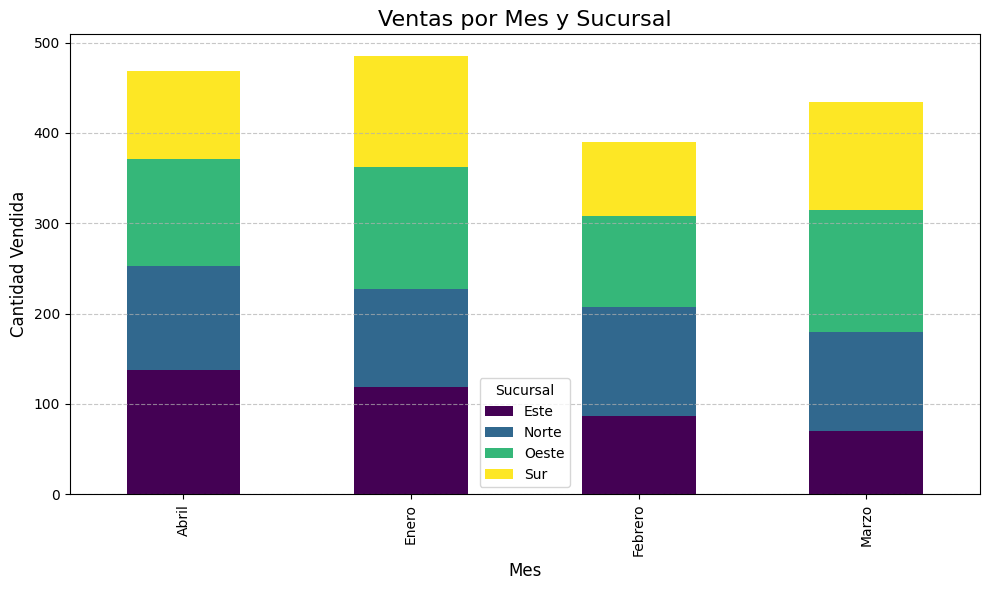

In [23]:
import matplotlib.pyplot as plt

pivot_data = df.pivot_table(
    index="Mes",
    columns="Sucursal",
    values="Cantidad_vendida",
    aggfunc="sum",
    fill_value=0
)

pivot_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    cmap="viridis"  # Opcional: Cambia el esquema de colores
)

plt.title("Ventas por Mes y Sucursal", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.legend(title="Sucursal", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

•	Crear un gráfico de dispersión para mostrar la relación entre las columnas “Precio Unitario” y “Cantidad Vendida”.  

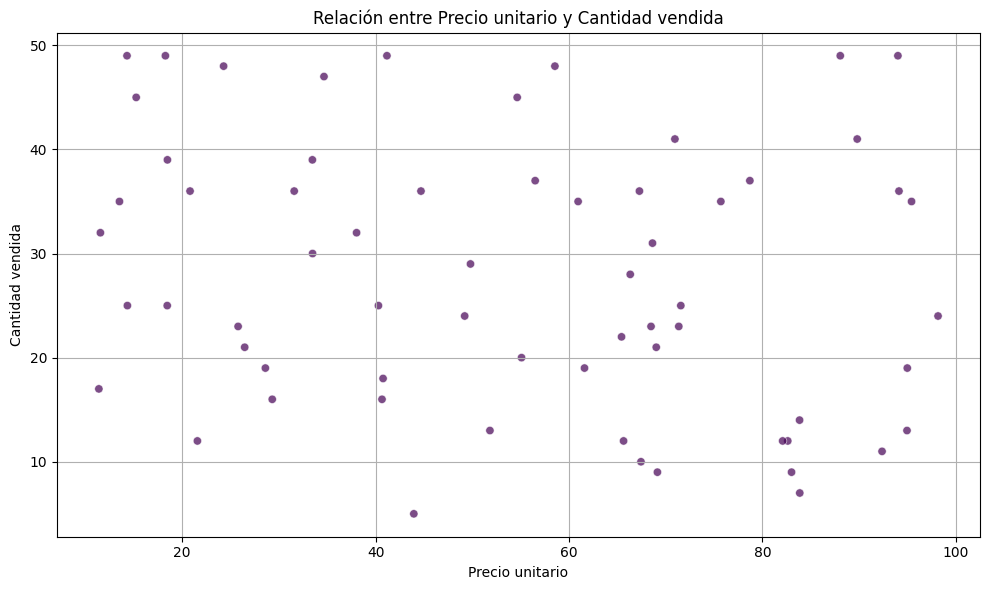

In [29]:
Precio_unitario = df["Precio_unitario"]
Cantidad_vendida = df["Cantidad_vendida"]

c = [100] * (len(Precio_unitario))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(Precio_unitario, Cantidad_vendida, c=c, cmap='viridis', alpha=0.7, edgecolors='w', linewidth=0.5)

plt.xlabel('Precio unitario')
plt.ylabel('Cantidad vendida')
plt.title('Relación entre Precio unitario y Cantidad vendida')

plt.tight_layout()
plt.grid()
plt.show()